In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [43]:
df=pd.read_csv("C:\\Users\\SAI\\machine-learning-prediction using Streamlit\\healthcare-stroke-prediction\\healthcare-dataset-stroke-data.csv")

In [44]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


#### EDA

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [46]:
df.shape

(5110, 12)

In [47]:
df.dropna(how='any',inplace=True)

In [48]:
df.shape

(4909, 12)

In [49]:
df[df['id']==51676]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke


In [50]:
df['work_type'].unique()

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

In [51]:
df['gender'].unique()

array(['Male', 'Female', 'Other'], dtype=object)

In [52]:
df['Residence_type'].unique()

array(['Urban', 'Rural'], dtype=object)

In [53]:
df['smoking_status'].unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

In [54]:
df['ever_married'].unique()

array(['Yes', 'No'], dtype=object)

In [55]:
df[df['smoking_status']== 'Unknown']

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1
23,64778,Male,82.0,0,1,Yes,Private,Rural,208.30,32.5,Unknown,1
31,33879,Male,42.0,0,0,Yes,Private,Rural,83.41,25.4,Unknown,1
38,47306,Male,58.0,0,0,No,Private,Rural,92.62,32.0,Unknown,1
67,72366,Male,76.0,0,0,Yes,Private,Urban,104.47,20.3,Unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5098,579,Male,9.0,0,0,No,children,Urban,71.88,17.5,Unknown,0
5101,36901,Female,45.0,0,0,Yes,Private,Urban,97.95,24.5,Unknown,0
5103,22127,Female,18.0,0,0,No,Private,Urban,82.85,46.9,Unknown,0
5104,14180,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0


In [56]:
print(df[['age']].min())
print(df[['age']].max().max())
df.age.min()

age    0.08
dtype: float64
82.0


0.08

#### label encoding manually for respective columns

In [57]:
cleanup_nums = {"gender":     {"Male": 0, "Female": 1, "Other":2},
                "work_type": {'Private': 0, 'Self-employed': 1, 'Govt_job':2, 'children':3, 'Never_worked':4},
                "Residence_type":{'Urban': 0, 'Rural': 1},
                "smoking_status": {'formerly smoked': 0, 'never smoked': 1, 'smokes':2, 'Unknown':3},
              "ever_married":{'No': 0, 'Yes': 1} }

In [58]:
df=df.replace(cleanup_nums)


In [59]:
df['smoking_status'].unique()

array([0, 1, 2, 3], dtype=int64)

In [60]:
## another type of 

""""df["gender1"] = df["gender"].astype('category')
df.dtypes
df["gender1"] = df["gender1"].cat.codes
df.head()"""

'"df["gender1"] = df["gender"].astype(\'category\')\ndf.dtypes\ndf["gender1"] = df["gender1"].cat.codes\ndf.head()'

In [61]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [62]:
X=df[df.columns[1:-1]]
X

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,0,67.0,0,1,1,0,0,228.69,36.6,0
2,0,80.0,0,1,1,0,1,105.92,32.5,1
3,1,49.0,0,0,1,0,0,171.23,34.4,2
4,1,79.0,1,0,1,1,1,174.12,24.0,1
5,0,81.0,0,0,1,0,0,186.21,29.0,0
...,...,...,...,...,...,...,...,...,...,...
5104,1,13.0,0,0,0,3,1,103.08,18.6,3
5106,1,81.0,0,0,1,1,0,125.20,40.0,1
5107,1,35.0,0,0,1,1,1,82.99,30.6,1
5108,0,51.0,0,0,1,0,1,166.29,25.6,0


In [63]:
y=df[df.columns[-2]]
y

0       0
2       1
3       2
4       1
5       0
       ..
5104    3
5106    1
5107    1
5108    0
5109    3
Name: smoking_status, Length: 4909, dtype: int64

#### train-test-split

In [64]:
from sklearn.model_selection import train_test_split

In [65]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [66]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3289 entries, 4904 to 916
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             3289 non-null   int64  
 1   age                3289 non-null   float64
 2   hypertension       3289 non-null   int64  
 3   heart_disease      3289 non-null   int64  
 4   ever_married       3289 non-null   int64  
 5   work_type          3289 non-null   int64  
 6   Residence_type     3289 non-null   int64  
 7   avg_glucose_level  3289 non-null   float64
 8   bmi                3289 non-null   float64
 9   smoking_status     3289 non-null   int64  
dtypes: float64(3), int64(7)
memory usage: 282.6 KB


### model selection

In [67]:
from sklearn.linear_model import LogisticRegression
logr=LogisticRegression()
logr.fit(X_train,y_train)


C:\Users\SAI\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [68]:
predictions=logr.predict(X_test)

In [69]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.99      0.95      0.97       276
           1       0.95      0.99      0.97       610
           2       0.83      0.70      0.76       231
           3       0.90      0.94      0.92       503

    accuracy                           0.93      1620
   macro avg       0.92      0.89      0.90      1620
weighted avg       0.92      0.93      0.92      1620



In [70]:
from sklearn .metrics import accuracy_score
score=accuracy_score(predictions,y_test)
score

0.9259259259259259

In [71]:
import pickle
pickle_out=open("models/healthcare-stroke-prediction_Logistic.pkl",'wb')
pickle.dump(logr,pickle_out)
pickle_out.close()

In [72]:
from sklearn.svm import SVC



In [73]:
svc=SVC()
svc.fit(X_train,y_train)
predictions_svc=svc.predict(X_test)

In [74]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions_svc))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       276
           1       0.43      0.96      0.60       610
           2       0.00      0.00      0.00       231
           3       0.88      0.48      0.62       503

    accuracy                           0.51      1620
   macro avg       0.33      0.36      0.30      1620
weighted avg       0.44      0.51      0.42      1620



C:\Users\SAI\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [75]:
import pickle
pickle_out=open("models/healthcare-stroke-prediction_SVC.pkl",'wb')
pickle.dump(svc,pickle_out)
pickle_out.close()

In [79]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()
dtree.fit(X_train,y_train)
predictions_dtree=dtree.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions_dtree))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       276
           1       1.00      1.00      1.00       610
           2       1.00      1.00      1.00       231
           3       1.00      1.00      1.00       503

    accuracy                           1.00      1620
   macro avg       1.00      1.00      1.00      1620
weighted avg       1.00      1.00      1.00      1620



#### Visualization

In [76]:
import seaborn as sns

<AxesSubplot:xlabel='gender', ylabel='count'>

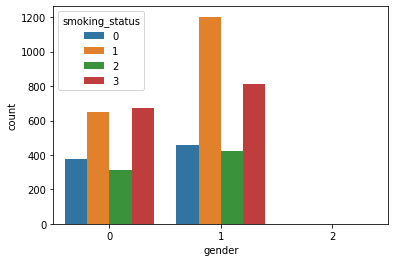

In [77]:
sns.countplot(hue='smoking_status',x='gender',data=df)